In [140]:
#Importing required packages
from qiskit import *
from qiskit.quantum_info import random_statevector
import numpy as np
import random
from qiskit.visualization import *
from math import *

In [141]:
#Initializing the circuit with 3 quantum and 2 classical registers
q=QuantumRegister(2)
c=ClassicalRegister(2)
circ=QuantumCircuit(q,c)
%matplotlib inline
#circ.initialize((1/sqrt(2),-1/sqrt(2)),2)
for i in range(0,2):
    circ.h(i)

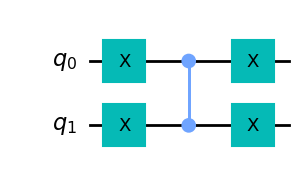

In [142]:
#Creating the oracle, flips the phase of the required bit string/qubits
oracle=QuantumCircuit(2,name="Oracle")
#Can change gates depending on the bit string to be searched. Here, '10' is the string to be searched. The first 'X' gate changes the state to 1
oracle.x(0)
oracle.x(1)
oracle.cz(0,1)
oracle.x(0)
oracle.x(1)
oracle.to_gate()
oracle.draw(output="mpl")

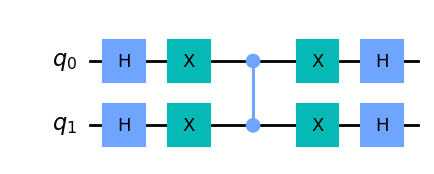

In [143]:
#Reflection gate 
ref=QuantumCircuit(2,name="Reflection")
ref.h([0,1])
ref.x([0,1])
ref.cz(0,1)
ref.x([0,1])
ref.h([0,1])
ref.to_gate()
ref.draw(output="mpl")

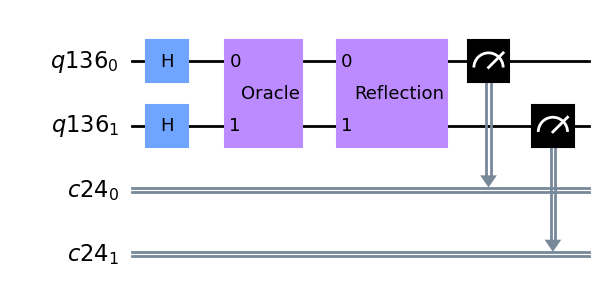

In [144]:
sim=Aer.get_backend("qasm_simulator")
circ.append(oracle,[0,1])
circ.append(ref,[0,1])
circ.measure([0,1],[0,1])
circ.draw(output="mpl", cregbundle=False)

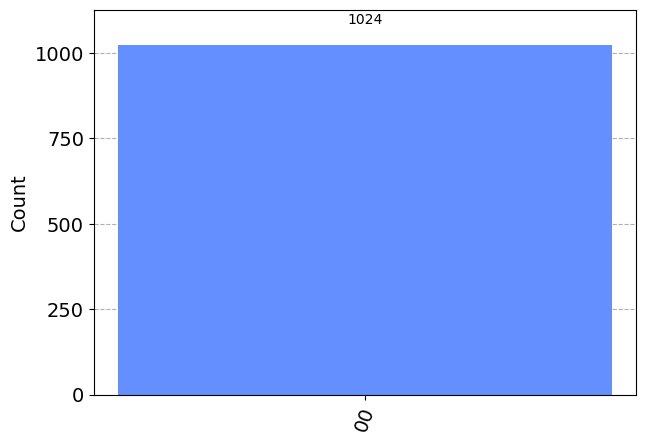

In [145]:
res=execute(circ,backend=sim,shots=1024).result()
plot_histogram(res.get_counts(circ))